In [2]:
import numpy as np
import matplotlib.pyplot as plt
import import_ipynb
import pandas as pd
import bioread
from scipy.fft import fft, fftfreq
from scipy import signal

In [3]:
def FIRrespt(ninput,xinput,nh,h):
    Nx=len(xinput);Nh=len(h);conv=np.convolve(xinput,h);n0=ninput[0]+nh[0];Nconv=Nx+Nh-1;nconv=np.arange(n0,n0 + Nconv);
    R = np.vstack((nconv,conv)).T
    return R   

In [4]:
def FIRrespf(w,h):
    Nh=len(h); H = 0
    for i in np.arange(Nh):
        H = H + h[i]*np.exp(-1j*w*i)
    R = np.vstack((w,abs(H),np.angle(H))).T
    return R 

In [5]:
def IIRrespt(xinput,c,d):
    N1 = len(xinput) # 
    nx = np.arange(-(len(c)-1),N1)
    x = xinput
    for k in np.arange(len(c)-1):
        x = np.insert(x,0,0)
    ny = np.arange(-(len(d)-1),N1)
    y = np.arange(0,len(ny),dtype=np.float64)
    for k in np.arange(len(d)-1):
        y[k] = 0
    for i in np.arange(len(d)-1,len(y)):
        z = 0
        for j in np.arange(1,len(d)):
            z = z - d[j]*y[i-j] + c[j]*x[i-j]
        y[i] = (z + c[0]* x[i])/d[0]
    R = np.vstack((ny,y)).T
    return R

In [6]:
def IIRrespf(w,c,d):
    Nc=len(c); Nd=len(d); Hnum = 0; Hden = 0
    for i in np.arange(Nc):
        Hnum = Hnum + c[i]*np.exp(-1j*w*i)
    for i in np.arange(Nd):
        Hden = Hden + d[i]*np.exp(-1j*w*i)
    H = np.divide(Hnum,Hden)
    R = np.vstack((w,abs(H),np.angle(H))).T
    return R

In [12]:
def FPM(nombreArchivo):
    ECG = bioread.read_file (nombreArchivo)
    canales = ECG.channels
    for i in np.arange (0,len(canales)):
        print (f"Canal {i}: {canales[i]}")

    canal_elegido = int (input ("Ingrese el canal que desea analizar:"))

    señal = ECG.channels[canal_elegido].data
    n = np.arange(len(señal))
    
    M = int(input('Ingrese el orden del FPM'))
    
    k = np.arange(0,30,dtype=float)
    FPM = np.piecewise(k,(k>=0)&(k<=M-1),[1/M,0])
    R= FIRrespt(n,señal,k,FPM)
    
    #Grafica de la señal
    plt.figure(figsize=(20,4),dpi=600)
    plt.title('Señal')
    plt.xlabel('n muestras')
    plt.plot(n,señal,"k")
    plt.plot(R[:,0],R[:,1],"y",label=("FPM de Orden",M))
    plt.legend(fontsize=12)
    plt.grid (True)
    plt.savefig('../imagenes/FPM.jpg', dpi=600, bbox_inches='tight')
    plt.show()


Canal 0: Channel ECG (.05 - 150 Hz): 20167 samples, 1000.0 samples/sec, loaded: True


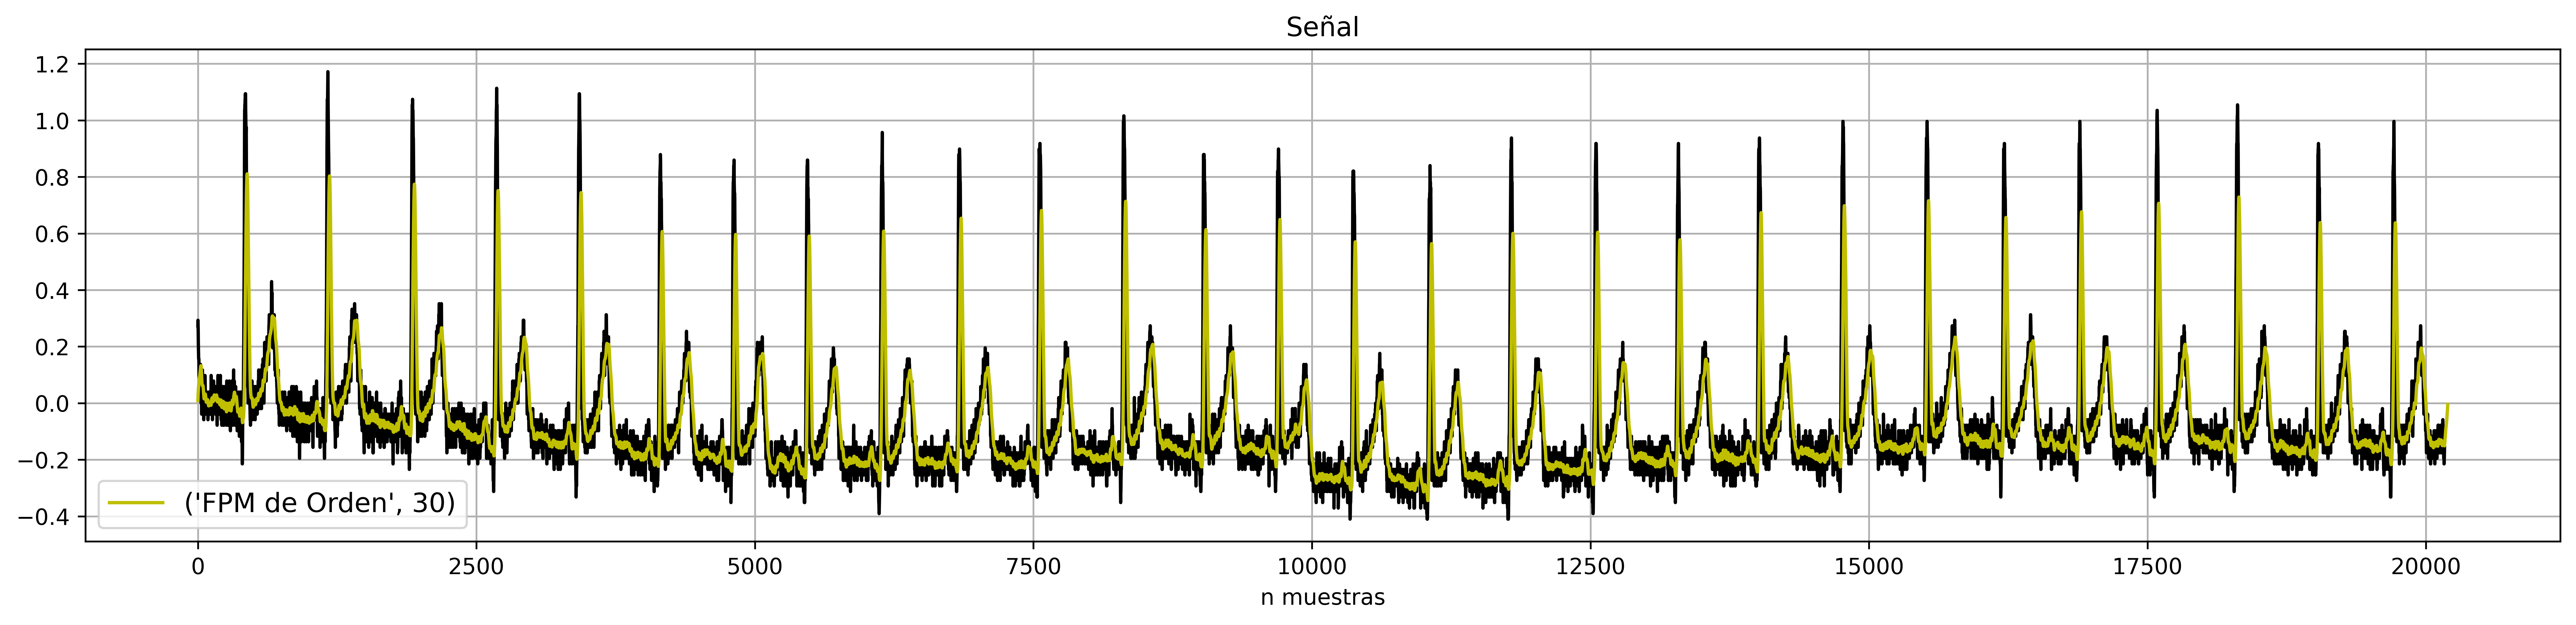

In [13]:
FPM ("/Users/paulaaguirrecarol/Desktop/PDSB 1/2. ecg_sinf.acq")